### Projeto final de Ciência dos Dados: Classificação de Pokémons a partir da sua cor e... 

##### Feito por:
Enrico Aloisi Nardi e Evandro Fontana Romeiro- 2º semestre de engenharia (Insper 2018)


##### Ideia geral do projeto:
A partir do que será apresentado, buscaremos tentar encontrar uma relação explícita entre os stats de um Pokémon, a sua cor e a sua categoria.

In [199]:
# Imports necessários para o projeto:
import os
import colorsys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from colorthief import ColorThief
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame as df
from sklearn import cluster
from pandas import ExcelWriter
from sklearn.cluster import KMeans
%matplotlib inline

In [200]:
data= pd.read_csv('Pokemon.csv') #lendo o database baixado do kaggle 

#O bloco a seguir encontra-se comentado para que o comando criador.save() não interfira nas alterações feitas no excel pelo computador
#transformando o database csv em excel para poder eliminar incongruências entre a base de fotos e a de dados sobre os 
#Pokémons
# criador = ExcelWriter('Pokexcel.xlsx')                         
# data.to_excel(criador,'Sheet5')
# criador.save()  

# TESTE DO ALGORITMO COM OS POKÉMONS DA PRIMEIRA GERAÇÃO 

In [212]:
data_teste= pd.read_excel('Pokexcel2.xlsx') #lendo o database baixado do kaggle 
lis_cores_rgb_t = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv_t = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/poketeste/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante_t = color_thief.get_color(quality=1)
    lis_cores_rgb_t.append(cor_predominante_t)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv_t = colorsys.rgb_to_hsv(cor_predominante[0], cor_predominante[1], cor_predominante[2])
    
    lis_cores_hsv_t.append(cor_predominante_hsv_t)

Daqui em diante, uma vez que o algoritmo pronto do KMeans não trabalha com strings, foi feita a seguinte mudança do nome da categoria de um Pokémon para um número:

| Categoria     | Número equivalente          
| ------------- |:-------------
| Water    | 0
| Normal   | 1
| Grass    | 2
| Bug      | 3
| Psychic  | 4
| Fire     | 5
| Electric | 6
| Rock     | 7
| Ghost    | 8
| Dragon   | 9
| Ground   | 10
| Dark     | 11
| Poison   | 12
| Steel    | 13
| Fighting | 14
| Ice      | 15
| Fairy    | 16
| Flying   | 17



In [213]:
data_teste['R'] = [x[0] for x in lis_cores_rgb_t]
data_teste['G'] = [x[1] for x in lis_cores_rgb_t]
data_teste['B'] = [x[2] for x in lis_cores_rgb_t]

data_teste.loc[data['Type 1'] == 'Water'   , "Categoria_Num"] = "0"
data_teste.loc[data['Type 1'] == 'Normal'  , "Categoria_Num"] = "1"
data_teste.loc[data['Type 1'] == 'Grass'   , "Categoria_Num"] = "2"
data_teste.loc[data['Type 1'] == 'Bug'     , "Categoria_Num"] = "3"
data_teste.loc[data['Type 1'] == 'Psychic' , "Categoria_Num"] = "4"
data_teste.loc[data['Type 1'] == 'Fire'    , "Categoria_Num"] = "5"
data_teste.loc[data['Type 1'] == 'Electric', "Categoria_Num"] = "6"
data_teste.loc[data['Type 1'] == 'Rock'    , "Categoria_Num"] = "7"
data_teste.loc[data['Type 1'] == 'Ghost'   , "Categoria_Num"] = "8"
data_teste.loc[data['Type 1'] == 'Dragon'  , "Categoria_Num"] = "9"
data_teste.loc[data['Type 1'] == 'Ground'  , "Categoria_Num"] = "10"
data_teste.loc[data['Type 1'] == 'Dark'    , "Categoria_Num"] = "11"
data_teste.loc[data['Type 1'] == 'Poison'  , "Categoria_Num"] = "12"
data_teste.loc[data['Type 1'] == 'Steel'   , "Categoria_Num"] = "13"
data_teste.loc[data['Type 1'] == 'Fighting', "Categoria_Num"] = "14"
data_teste.loc[data['Type 1'] == 'Ice'     , "Categoria_Num"] = "15"
data_teste.loc[data['Type 1'] == 'Fairy'   , "Categoria_Num"] = "16"
data_teste.loc[data['Type 1'] == 'Flying'  , "Categoria_Num"] = "17"

data2 = data_teste.drop(['Type 1','Type 2','Legendary','Name'], axis= 1)
data2.head(3)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,R,G,B,Categoria_Num
0,1,318,45,49,49,65,65,45,1,120,180,152,2
1,2,405,60,62,63,80,80,60,1,140,183,115,2
2,3,525,80,82,83,100,100,80,1,218,179,186,2


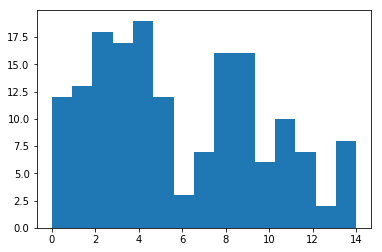

In [214]:
modelo_parcial= KMeans(n_clusters= 15) #o número de clusters foi definido a partir do número de dados categorias diferentes de Pokémons
                              #(15 no caso da primeira geração) 
modelo_parcial.fit(data2)
y_pred = modelo_parcial.predict(data2) #lista que guarda qual é o cluster ao qual pertence cada um dos pokémons
plt.hist(y_pred, bins= 15);

In [215]:
score = model.score(data2)
score

-1086872.066865083

# APLICANDO O APRESENTADO NA BASE DE DADOS INTEIRA#

Lendo os dados com o tamanho já acertado para ser compatível com a base de imagens

In [216]:
data_final= pd.read_excel('Pokexcel.xlsx') #lendo os dados já alterados e com o memso número de fotos

In [228]:
lis_cores_rgb_f = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv_f = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/pokeimagens/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante_f = color_thief.get_color(quality=1)
    lis_cores_rgb_f.append(cor_predominante_f)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv_f = colorsys.rgb_to_hsv(cor_predominante[0], cor_predominante[1], cor_predominante[2])
    
    lis_cores_hsv_f.append(cor_predominante_hsv_f)


data_final['R'] = [x[0] for x in lis_cores_rgb_f]
data_final['G'] = [x[1] for x in lis_cores_rgb_f]
data_final['B'] = [x[2] for x in lis_cores_rgb_f]

data_final.loc[data['Type 1'] == 'Water'   , "Categoria_Num"] = "0"
data_final.loc[data['Type 1'] == 'Normal'  , "Categoria_Num"] = "1"
data_final.loc[data['Type 1'] == 'Grass'   , "Categoria_Num"] = "2"
data_final.loc[data['Type 1'] == 'Bug'     , "Categoria_Num"] = "3"
data_final.loc[data['Type 1'] == 'Psychic' , "Categoria_Num"] = "4"
data_final.loc[data['Type 1'] == 'Fire'    , "Categoria_Num"] = "5"
data_final.loc[data['Type 1'] == 'Electric', "Categoria_Num"] = "6"
data_final.loc[data['Type 1'] == 'Rock'    , "Categoria_Num"] = "7"
data_final.loc[data['Type 1'] == 'Ghost'   , "Categoria_Num"] = "8"
data_final.loc[data['Type 1'] == 'Dragon'  , "Categoria_Num"] = "9"
data_final.loc[data['Type 1'] == 'Ground'  , "Categoria_Num"] = "10"
data_final.loc[data['Type 1'] == 'Dark'    , "Categoria_Num"] = "11"
data_final.loc[data['Type 1'] == 'Poison'  , "Categoria_Num"] = "12"
data_final.loc[data['Type 1'] == 'Steel'   , "Categoria_Num"] = "13"
data_final.loc[data['Type 1'] == 'Fighting', "Categoria_Num"] = "14"
data_final.loc[data['Type 1'] == 'Ice'     , "Categoria_Num"] = "15"
data_final.loc[data['Type 1'] == 'Fairy'   , "Categoria_Num"] = "16"
data_final.loc[data['Type 1'] == 'Flying'  , "Categoria_Num"] = "17"

data_f = data_final.drop(['Type 1','Type 2','Legendary','Name'], axis= 1)
data_f.tail(10)

IndexingError: (0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10      True
11      True
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
770    False
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795    False
796    False
797    False
798    False
799    False
Name: Type 1, Length: 800, dtype: bool, 'Categoria_Num')

In [229]:
len(data_final), len(lis_cores_rgb_f)

(804, 804)

Extraindo a cor predominante de cada imagem e armazenando-a em listas nos formatos RGB e HSV

In [ ]:
lis_cores_rgb = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/pokemon/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante = color_thief.get_color(quality=1)
    lis_cores_rgb.append(cor_predominante)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv = colorsys.rgb_to_hsv(cor_predominante[0], cor_predominante[1], cor_predominante[2])
    
    lis_cores_hsv.append(cor_predominante_hsv)

## Análise exploratória dos dados

Começamos a nossa análise exploratória com um hsitograma e uma contagem de pokémons por categoria a fim de entender como eles estão distribuídos.

In [ ]:
data['Type 1'].value_counts()

In [ ]:
# Histograma que permite a visualização geral da distribuição dos pokémons de acordo com o seu tipo principal (Type 1)
plt.hist(data['Type 1'], rwidth= .9, bins= 18);
plt.rcParams['figure.figsize'] = (15,15)

In [ ]:
R = [] 
G = []
B = []

for cor in lis_cores_rgb:
    R.append(cor[0])
    G.append(cor[1])
    B.append(cor[2])

fig = plt.figure()
ax = Axes3D(fig)

valores_x = R
valores_y = G
valores_z = B

ax.scatter(valores_x,valores_y,valores_z)
plt.xlabel('R')
plt.ylabel('G')
plt.show()
#O EIXO Z É O AZUL

## Aplicando o algoritmo do KMeans

In [ ]:
modelo_completo= KMeans(n_clusters= 18) #o número de clusters foi definido a partir do número de dados categorias diferentes de Pokémons
                                        #(18 no caso de todas as gerações até a sexta) 
modelo_completo.fit(data2)
y_pred = modelo_completo.predict(data2) #lista que guarda qual é o cluster ao qual pertence cada um dos pokémons
plt.hist(y_pred, bins= 18);


# Relatório do projeto

### Procedimentos realizados com as bases de dados (imagens + stats)

##### Imagens
Inicialmente, as imagens dos Pokémons são vetorizadas para que a função ColourThief possa extrair a cor predominante de cada uma delas. Neste ponto é importante notar que como a extensão das imagens dos Pokémons é .png, elas não têm fundo, ou seja, a cor extraída pela função não é afetada por um eventual fundo branco.

##### Stats
Embora tenham sido feitos vários testes com e sem algumas colunas dos dados originais -como inclusive será investigado em seções futuras do relatório-, algumas colunas não foram utilizadas em nenhum momento da análise, tais como Nomes, tipo secundário e se o Pokémon é lendário ou não.

### Método de análise utilizado
#### Explicando o K-means

### Verificando a qualidade da classificação em diferentes cenários

#### Código de cores: RGB vs. HSV
#### Com stats e sem stats
#### Com geração e sem geração

##### Fontes:
CSV com dados sobre os Pokémons: https://www.kaggle.com/abcsds/pokemon

Database de fotos: https://www.kaggle.com/kvpratama/pokemon-images-dataset